## PCAしたデータを階層的クラスタリング
---
### Method: Euclidean distance or Cosine similarity

In [1]:
#Import library

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Set Config
CONFIG = {
  "file" : "PCAed_data.csv"
    , "detail" : [("euclidean", "ward"), ("cosine", "single"), ("correlation", "single")]
    , "title" : ["Euclidean Distance", "Cosine Similarity", "Correlation"]
}

In [3]:
#Load Data
df = pd.read_csv(CONFIG['file'], index_col=0)

In [4]:
# Define Original Function
def select(i, config):
    metric, method = config["detail"][i]
    title = config["title"][i]
    return {"metric":metric, "method":method, "title":title}

def plot_dendro(x, title):
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    dendrogram(x, labels=df.index)
    plt.title(title, size=10)
    plt.xlabel('Sample', size=10)
    plt.ylabel('Threshold', size=10)
    plt.tick_params(labelsize=8)
    return None

def plot_stats(x, title):
    n_data = x.shape[0]
    val1 = x[:, 1:3].copy()
    val1[:, 0] = np.arange(n_data, 0, -1)
    plt.subplot(1, 2, 2)
    plt.plot(val1[:, 1], val1[:, 0], 'ko-')
    plt.title(f"Threshold vs Cluster Num ({title})", size=8)
    plt.xlabel('Threshold')
    plt.ylabel('Num of Clusters')
    return None

def whole_process(df, config):
    n_data = len(config["detail"])
    for i in range(n_data):
        select(i, config)
        arg = select(i, config)
        x = linkage(df, metric=arg["metric"], method=arg["method"])
        plot_dendro(x, arg["title"])
        plot_stats(x, arg["title"])
    return "Process compleated"   

'Process compleated'

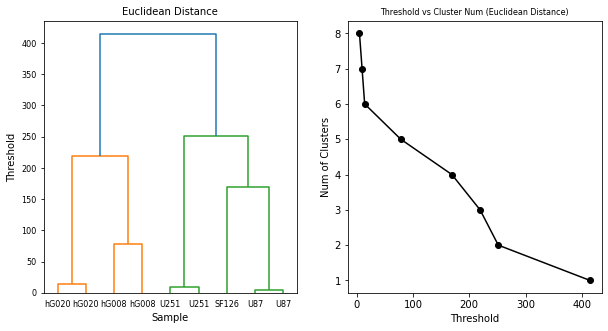

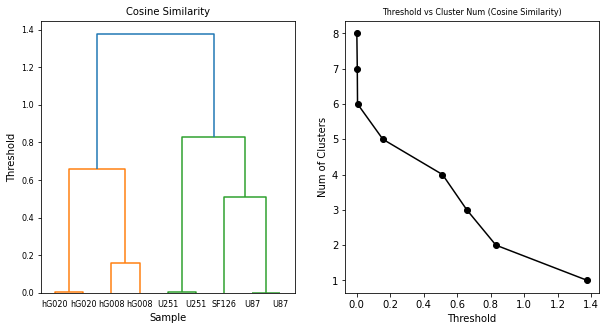

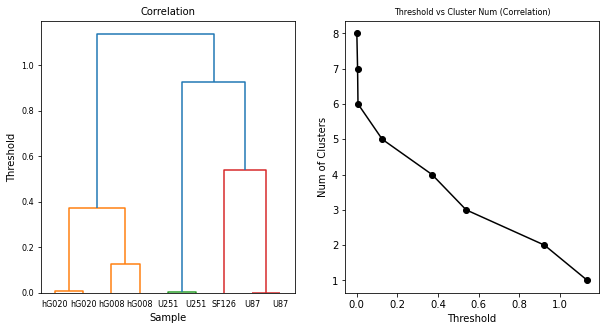

In [5]:
whole_process(df, CONFIG)